In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
def asympRead(particle, cutoff, prefix): 
    return pd.concat([pd.read_csv("output/{}/{}/asymp-{:d}.dat".format(prefix, particle, cutscale), header=None, names=["E", str(cutscale)], index_col=0)\
                      for cutscale in cutoff], axis=1)\
          ,pd.read_csv("output/{}/{}/minE.dat".format(prefix, particle), header=None, names=["cutscale", "E"], index_col=0)

In [9]:
def plotParticle(ax, pname, prefix):
    config = json.load(open("particles-"+prefix+".cfg"))
    data, peaks = asympRead(pname, config[pname]["cutscales"], prefix)
    plotData = data.loc[(data.index > -np.inf) & (data.index < np.inf)].plot(marker="o", ls="", logy=True, ax=ax, title=pname+"("+"{:.5f}".format(2*config[pname]["eq"]["env"]["mC"]+peaks.iloc[-1][0])+")")
    for line in ax.get_lines():
        color = line._get_markerfacecolor()
        pos = line.get_label()
        plotData.axvline(peaks.loc[int(pos)][0], ls="--", color=color)

In [5]:
def doPlots(prefix):
    config = json.load(open("particles-"+prefix+".cfg"))
    fig, axes = plt.subplots(len(config), figsize=(plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1]*len(config)))
    for i,pname in enumerate(config.keys()):
        plotParticle(axes[i], pname, prefix)

In [6]:
def printCheck(prefix):
    config = json.load(open("particles-"+prefix+".cfg"))
    for pname in config.keys():
        peaks = pd.read_csv("output/{}/{}/minE.dat".format(prefix, pname), header=None, names=["cutscale", "E"], index_col=0)
        print("{}({})".format(pname,peaks.iloc[-1][0]))
        print("peaks - peaks[-1]")
        print(peaks - peaks.iloc[-1])
        print("\n")
        print("peaks[i]-peaks[i-1]")
        print(peaks.diff())
        print("\n---\n")

In [16]:
def readMine(prefix):
    config = json.load(open("particles-"+prefix+".cfg"))
    my = dict()
    for pname in config.keys():
        peaks = pd.read_csv("output/{}/{}/minE.dat".format(prefix, pname), header=None, names=["cutscale", "E"], index_col=0)
        my.update({pname: np.array([1000*(2*config[pname]["eq"]["env"]["mC"]+peaks.iloc[-1][0])])})
    my = pd.DataFrame.from_dict(my, orient="index")
    my.columns = ["my("+prefix+")"]
    return my

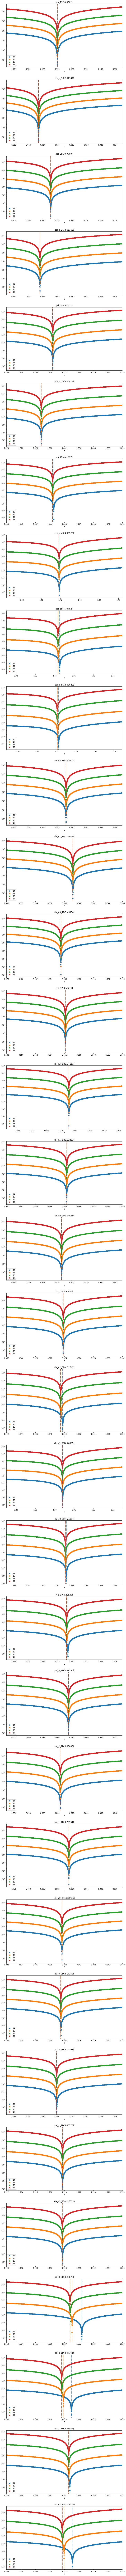

In [14]:
doPlots("lin")

In [37]:
printCheck("lin")

psi_1S(0.13002385972906)
peaks - peaks[-1]
                     E
cutscale              
14       -1.089700e-10
15       -4.660022e-12
16        9.300061e-13
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15        1.043100e-10
16        5.590028e-12
17       -9.300061e-13

---

eta_c_1S(0.013423036888241998)
peaks - peaks[-1]
                     E
cutscale              
14       -3.129250e-10
15       -7.450600e-11
16        1.490100e-11
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15        2.384190e-10
16        8.940700e-11
17       -1.490100e-11

---

psi_2S(0.7110919998958699)
peaks - peaks[-1]
                     E
cutscale              
14        2.586097e-08
15        1.065430e-09
16        5.215006e-11
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15       -2.479554e-08
16 

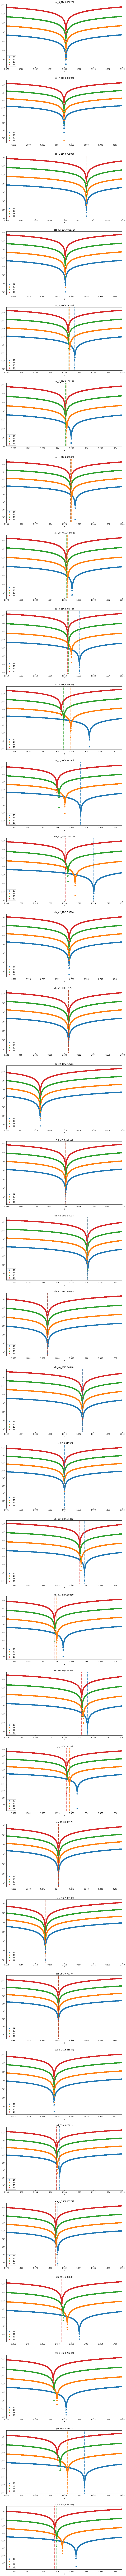

In [13]:
doPlots("scr")

In [38]:
printCheck("scr")

psi_3_1D(0.9862017131485)
peaks - peaks[-1]
                     E
cutscale              
14        3.048357e-06
15        4.693829e-07
16        6.015227e-08
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15       -2.578974e-06
16       -4.092306e-07
17       -6.015227e-08

---

psi_2_1D(0.9849396262019899)
peaks - peaks[-1]
                     E
cutscale              
14        2.581134e-06
15        3.962666e-07
16        5.055964e-08
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15       -2.184868e-06
16       -3.457069e-07
17       -5.055964e-08

---

psi_1_1D(0.9730253253476701)
peaks - peaks[-1]
                     E
cutscale              
14        1.867722e-06
15        2.809269e-07
16        3.523659e-08
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15       -1.586795e-06
16


---

psi_3S(1.206908601284)
peaks - peaks[-1]
                 E
cutscale          
14        0.000431
15        0.000099
16        0.000018
17        0.000000


peaks[i]-peaks[i-1]
                 E
cutscale          
14             NaN
15       -0.000332
16       -0.000081
17       -0.000018

---

eta_c_3S(1.1807873101531998)
peaks - peaks[-1]
                 E
cutscale          
14        0.000282
15        0.000062
16        0.000011
17        0.000000


peaks[i]-peaks[i-1]
                 E
cutscale          
14             NaN
15       -0.000220
16       -0.000051
17       -0.000011

---

psi_4S(1.4586347525581003)
peaks - peaks[-1]
                 E
cutscale          
16        0.002402
17        0.000752
18        0.000179
19        0.000000


peaks[i]-peaks[i-1]
                 E
cutscale          
16             NaN
17       -0.001650
18       -0.000573
19       -0.000179

---

eta_c_4S(1.4404377108111)
peaks - peaks[-1]
                 E
cutscale          
16        0

In [17]:
article = pd.read_csv("../data/charmonia.csv", index_col=0)
res = article.join(readMine("lin")).join(readMine("scr"))

In [33]:
compiled = res.join(\
    res["LP"].subtract(res["my(lin)"], axis=0).abs().rename("dev(lin)")\
).join(\
    res.subtract(res["my(lin)"], axis=0).abs().drop(["my(lin)"], axis=1).min(axis=1).rename("alldev(lin)")\
).join(\
    res["SP"].subtract(res["my(scr)"], axis=0).abs().rename("dev(scr)")\
).join(\
    res.subtract(res["my(scr)"], axis=0).abs().drop(["my(scr)"], axis=1).min(axis=1).rename("alldev(scr)")\
)\
.round({"dev(scr)": 3, "alldev(scr)": 3, "alldev(lin)": 3, "dev(lin)": 3})

compiled = compiled.join(\
    compiled["dev(lin)"].add(compiled["dev(scr)"]).rename("dev(tot)")\
)\
.join(\
    compiled["alldev(lin)"].add(compiled["alldev(scr)"]).rename("alldev(tot)")\
)\
.reindex_axis(["exp", "8", "11", "LP", "my(lin)", "dev(lin)", "alldev(lin)", "SP", "my(scr)", "dev(scr)", "alldev(scr)", "dev(tot)", "alldev(tot)"], axis=1)\

In [34]:
compiled.sort_values("alldev(tot)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin),SP,my(scr),dev(scr),alldev(scr),dev(tot),alldev(tot)
name,,,,,,,,,,,,,
h_c_2P,NaN,3934.0,3908,3940,3939.834604,0.165,0.165,3916,3915.963116,0.037,0.037,0.202,0.202
psi_1S,3097.0,3090.0,3097,3097,3096.023860,0.976,0.148,3097,3096.172251,0.828,0.148,1.804,0.296
h_c_1P,3525.0,3516.0,3519,3522,3522.131523,0.132,0.132,3526,3526.178089,0.178,0.178,0.310,0.310
eta_c2_3D,NaN,NaN,4326,4478,4477.701360,0.299,0.299,4336,4336.134176,0.134,0.134,0.433,0.433
eta_c2_1D,NaN,3799.0,3796,3806,3805.658373,0.342,0.342,3805,3805.109061,0.109,0.109,0.451,0.451
eta_c2_2D,NaN,4158.0,4099,4164,4163.707662,0.292,0.292,4108,4108.233653,0.234,0.234,0.526,0.526
h_c_3P,NaN,4279.0,4184,4285,4285.291267,0.291,0.291,4193,4193.280006,0.280,0.280,0.571,0.571
psi_2_1D,3823.0,3800.0,3798,3807,3806.425352,0.575,0.514,3807,3806.939626,0.060,0.060,0.635,0.574
psi_3_1D,NaN,3806.0,3799,3811,3811.556803,0.557,0.557,3808,3808.201713,0.202,0.202,0.759,0.759


In [35]:
compiled.sort_values("dev(scr)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin),SP,my(scr),dev(scr),alldev(scr),dev(tot),alldev(tot)
name,,,,,,,,,,,,,
h_c_2P,NaN,3934.0,3908,3940,3939.834604,0.165,0.165,3916,3915.963116,0.037,0.037,0.202,0.202
psi_2_1D,3823.0,3800.0,3798,3807,3806.425352,0.575,0.514,3807,3806.939626,0.060,0.060,0.635,0.574
eta_c2_1D,NaN,3799.0,3796,3806,3805.658373,0.342,0.342,3805,3805.109061,0.109,0.109,0.451,0.451
psi_2_2D,NaN,4158.0,4100,4165,4163.913738,1.086,1.086,4109,4109.113053,0.113,0.113,1.199,1.199
eta_c2_3D,NaN,NaN,4326,4478,4477.701360,0.299,0.299,4336,4336.134176,0.134,0.134,0.433,0.433
h_c_1P,3525.0,3516.0,3519,3522,3522.131523,0.132,0.132,3526,3526.178089,0.178,0.178,0.310,0.310
psi_3_1D,NaN,3806.0,3799,3811,3811.556803,0.557,0.557,3808,3808.201713,0.202,0.202,0.759,0.759
eta_c2_2D,NaN,4158.0,4099,4164,4163.707662,0.292,0.292,4108,4108.233653,0.234,0.234,0.526,0.526
h_c_3P,NaN,4279.0,4184,4285,4285.291267,0.291,0.291,4193,4193.280006,0.280,0.280,0.571,0.571


In [36]:
compiled.sort_values("alldev(scr)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin),SP,my(scr),dev(scr),alldev(scr),dev(tot),alldev(tot)
name,,,,,,,,,,,,,
h_c_2P,NaN,3934.0,3908,3940,3939.834604,0.165,0.165,3916,3915.963116,0.037,0.037,0.202,0.202
psi_2_1D,3823.0,3800.0,3798,3807,3806.425352,0.575,0.514,3807,3806.939626,0.060,0.060,0.635,0.574
eta_c2_1D,NaN,3799.0,3796,3806,3805.658373,0.342,0.342,3805,3805.109061,0.109,0.109,0.451,0.451
psi_2_2D,NaN,4158.0,4100,4165,4163.913738,1.086,1.086,4109,4109.113053,0.113,0.113,1.199,1.199
eta_c2_3D,NaN,NaN,4326,4478,4477.701360,0.299,0.299,4336,4336.134176,0.134,0.134,0.433,0.433
psi_1S,3097.0,3090.0,3097,3097,3096.023860,0.976,0.148,3097,3096.172251,0.828,0.148,1.804,0.296
h_c_1P,3525.0,3516.0,3519,3522,3522.131523,0.132,0.132,3526,3526.178089,0.178,0.178,0.310,0.310
psi_3_1D,NaN,3806.0,3799,3811,3811.556803,0.557,0.557,3808,3808.201713,0.202,0.202,0.759,0.759
eta_c2_2D,NaN,4158.0,4099,4164,4163.707662,0.292,0.292,4108,4108.233653,0.234,0.234,0.526,0.526
